In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
super_df = pd.read_csv('streamlit_app\data\superstore.csv')

In [3]:
super_df

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


## Basic EDA


In [4]:
super_df['category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: category, dtype: int64

In [5]:
super_df.info

<bound method DataFrame.info of       row_id        order_id  order_date   ship_date       ship_mode  \
0          1  CA-2016-152156  2016-11-08  2016-11-11    Second Class   
1          2  CA-2016-152156  2016-11-08  2016-11-11    Second Class   
2          3  CA-2016-138688  2016-06-12  2016-06-16    Second Class   
3          4  US-2015-108966  2015-10-11  2015-10-18  Standard Class   
4          5  US-2015-108966  2015-10-11  2015-10-18  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422  2014-01-21  2014-01-23    Second Class   
9990    9991  CA-2017-121258  2017-02-26  2017-03-03  Standard Class   
9991    9992  CA-2017-121258  2017-02-26  2017-03-03  Standard Class   
9992    9993  CA-2017-121258  2017-02-26  2017-03-03  Standard Class   
9993    9994  CA-2017-119914  2017-05-04  2017-05-09    Second Class   

     customer_id     customer_name    segment        country             city  \
0       CG-12520      

In [6]:
super_df.describe()

,row_id,postal_code,sales,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
super_df['subcategory'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: subcategory, dtype: int64

In [8]:
super_df.isnull().sum()

row_id           0
order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
subcategory      0
product_name     0
sales            0
quantity         0
discount         0
profit           0
dtype: int64

# Furniture Forecasting

In [9]:
furniture = super_df.loc[super_df['category']== 'Furniture']

In [10]:
furniture.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [11]:
furniture.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'subcategory',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [12]:
r_col = ['row_id', 'order_id', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'subcategory',
       'product_name', 'quantity', 'discount', 'profit']

In [13]:
furniture.drop(r_col, axis =1 , inplace=True)

In [14]:
furniture

,order_date,sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


In [15]:
furniture['order_date'] = pd.to_datetime(furniture['order_date'])

In [16]:
furniture = furniture.sort_values('order_date')

In [17]:
furniture

,order_date,sales
7478,2014-01-06,2573.820
7664,2014-01-07,76.728
866,2014-01-10,51.940
717,2014-01-11,9.940
2984,2014-01-13,545.940
...,...,...
7640,2017-12-29,258.750
7636,2017-12-29,1207.840
5136,2017-12-29,101.120
7639,2017-12-29,300.980


In [18]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 7478 to 906
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   order_date  2121 non-null   datetime64[ns]
 1   sales       2121 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 49.7 KB


In [19]:
furniture  = furniture.set_index('order_date')

In [20]:
furniture

,sales
order_date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,545.940
...,...
2017-12-29,258.750
2017-12-29,1207.840
2017-12-29,101.120


In [21]:
furniture_y = furniture['sales'].resample('MS').mean()

In [22]:
furniture_y

order_date
2014-01-01    312.126250
2014-02-01    262.808286
2014-03-01    441.635030
2014-04-01    305.570654
2014-05-01    288.032792
2014-06-01    440.204187
2014-07-01    327.910636
2014-08-01    305.014438
2014-09-01    425.294300
2014-10-01    384.507719
2014-11-01    347.820527
2014-12-01    414.134682
2015-01-01    782.662773
2015-02-01    284.943091
2015-03-01    446.420821
2015-04-01    317.445409
2015-05-01    312.498350
2015-06-01    296.699192
2015-07-01    341.860500
2015-08-01    301.206006
2015-09-01    437.883717
2015-10-01    334.072875
2015-11-01    401.049773
2015-12-01    360.715925
2016-01-01    346.488318
2016-02-01    206.607947
2016-03-01    312.221756
2016-04-01    377.488286
2016-05-01    351.624070
2016-06-01    343.962421
2016-07-01    335.090231
2016-08-01    430.456286
2016-09-01    328.468445
2016-10-01    247.345354
2016-11-01    392.390479
2016-12-01    436.651369
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    

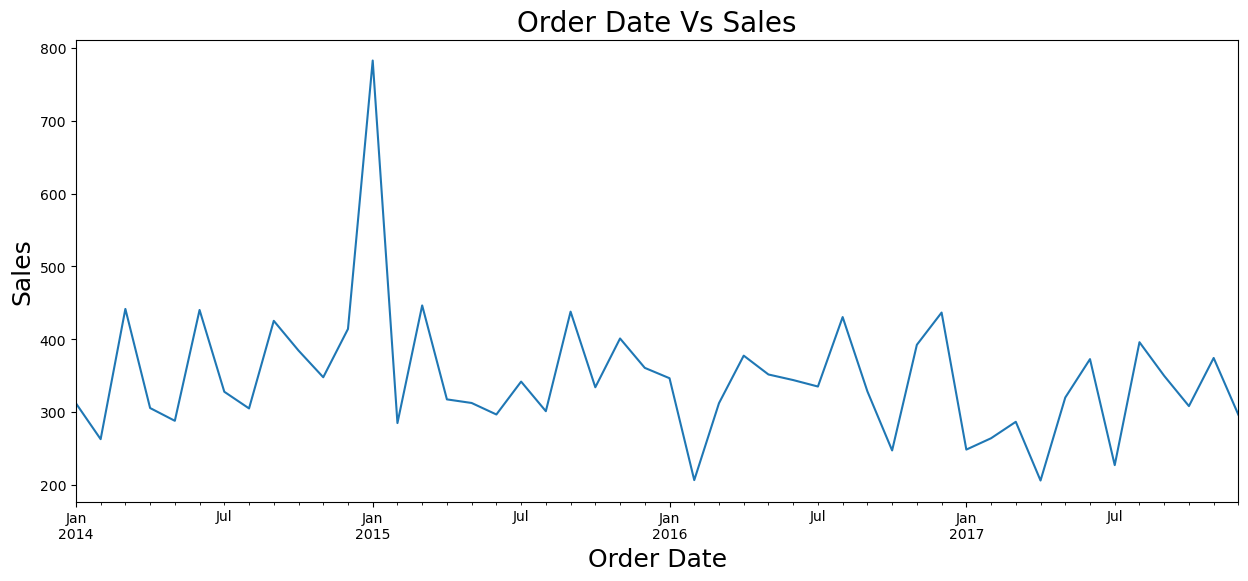

In [23]:
furniture_y.plot(figsize=(15,6))
plt.ylabel("Sales",fontsize=18)
plt.xlabel("Order Date",fontsize=18)
plt.title("Order Date Vs Sales",fontsize=20)
plt.show()

In [24]:
from pylab import rcParams as rc

In [25]:
rc['figure.figsize']= 10, 14

In [26]:
decomposition = sm.tsa.seasonal_decompose(furniture_y,model='additive')

# y(t) = Level + Trend + Seasonality + Noise --> Additive

In [27]:
print("Trend \n ")
print(decomposition.trend)
print("Seasonal \n ")
print(decomposition.seasonal)
print("Residual \n ")
print(decomposition.resid)
print("Observed \n ")
print(decomposition.observed)

Trend 
 
order_date
2014-01-01           NaN
2014-02-01           NaN
2014-03-01           NaN
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01    374.193980
2014-08-01    394.721952
2014-09-01    395.843644
2014-10-01    396.537833
2014-11-01    398.052013
2014-12-01    393.092036
2015-01-01    387.693906
2015-02-01    388.116466
2015-03-01    388.482340
2015-04-01    386.905447
2015-05-01    387.021881
2015-06-01    387.013984
2015-07-01    366.614267
2015-08-01    345.176367
2015-09-01    336.320775
2015-10-01    333.230934
2015-11-01    337.362959
2015-12-01    340.962498
2016-01-01    342.649705
2016-02-01    347.753039
2016-03-01    348.579497
2016-04-01    340.406881
2016-05-01    336.432430
2016-06-01    339.235603
2016-07-01    338.316789
2016-08-01    336.629079
2016-09-01    337.959488
2016-10-01    329.751323
2016-11-01    321.288243
2016-12-01    321.166778
2017-01-01    317.868371
2017-02-01    311.933890
2017-03-01    311.382148
2017-

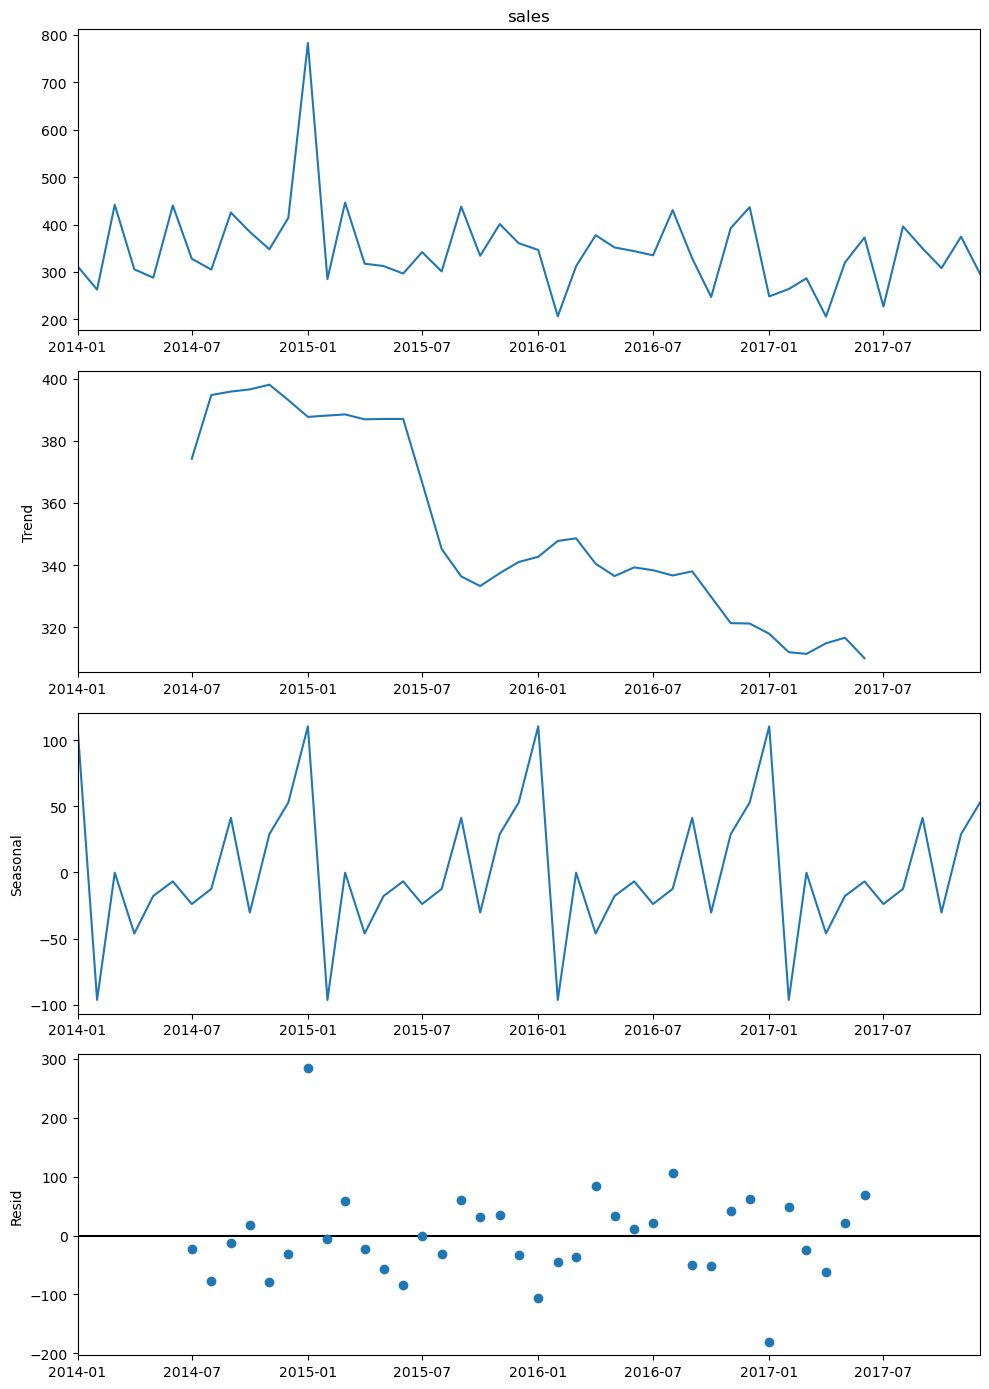

In [28]:
fig = decomposition.plot()
plt.show()

# Forecasting With ARIMA

In [29]:
p=d=q=range(0,2)

In [30]:
p,d,q

(range(0, 2), range(0, 2), range(0, 2))

In [31]:
pdq = list(itertools.product(p,d,q))

In [32]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [33]:
seasonal_pdq = [(x[0],x[1],x[2], 12) for x in pdq]

In [34]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [36]:

def calculate_aic(param, param_seasonal, target):
    try:
        mod = sm.tsa.statespace.SARIMAX(target,
                                       order=param,
                                       seasonal_order=param_seasonal,
                                       enforce_stationarity=False,
                                       enforce_invertibility=False)
        results = mod.fit()
        return results.aic
    except:
        return np.inf

# Calculate AIC for each combination of parameters
aic_values = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        aic = calculate_aic(param, param_seasonal, furniture_y)
        aic_values.append((param, param_seasonal, aic))

# Find the combination of parameters with the lowest AIC
best_param, best_param_seasonal, best_aic = min(aic_values, key=lambda x: x[2])

print('Best ARIMA{} x {} 12 -- AIC : {}'.format(best_param, best_param_seasonal, best_aic))


Best ARIMA(0, 1, 1) x (0, 1, 1, 12) 12 -- AIC : 251.24707755083713


In [37]:
mod = sm.tsa.statespace.SARIMAX(furniture_y, 
                                order=param, 
                                seasonal_order=param_seasonal, 
#                                 enforce_stationarity=False, 
                                enforce_invertibility=False)

In [38]:
results = mod.fit()

In [39]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0282      0.259     -0.109      0.913      -0.535       0.479
ma.L1         -1.0000   3959.675     -0.000      1.000   -7761.819    7759.819
ar.S.L12      -0.0458      0.168     -0.273      0.785      -0.375       0.283
ma.S.L12      -1.0000   3959.750     -0.000      1.000   -7761.968    7759.968
sigma2      7306.8530      0.499   1.46e+04      0.000    7305.875    7307.831


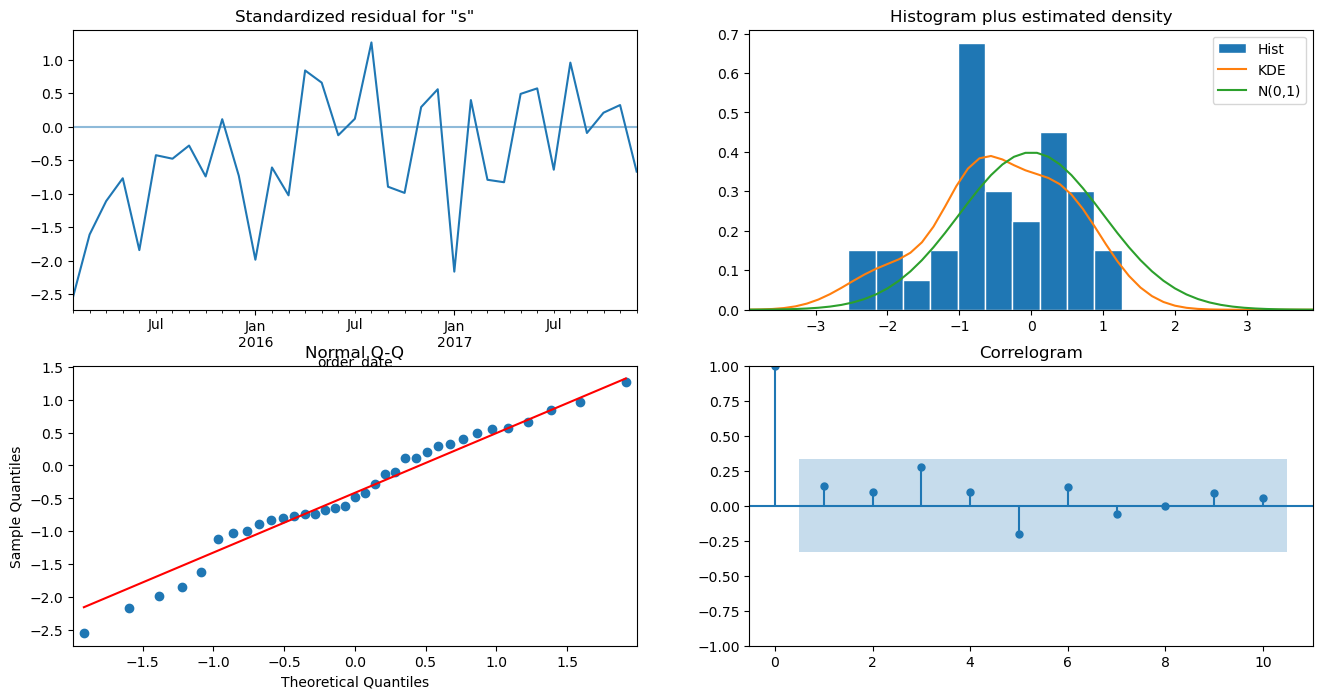

In [40]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

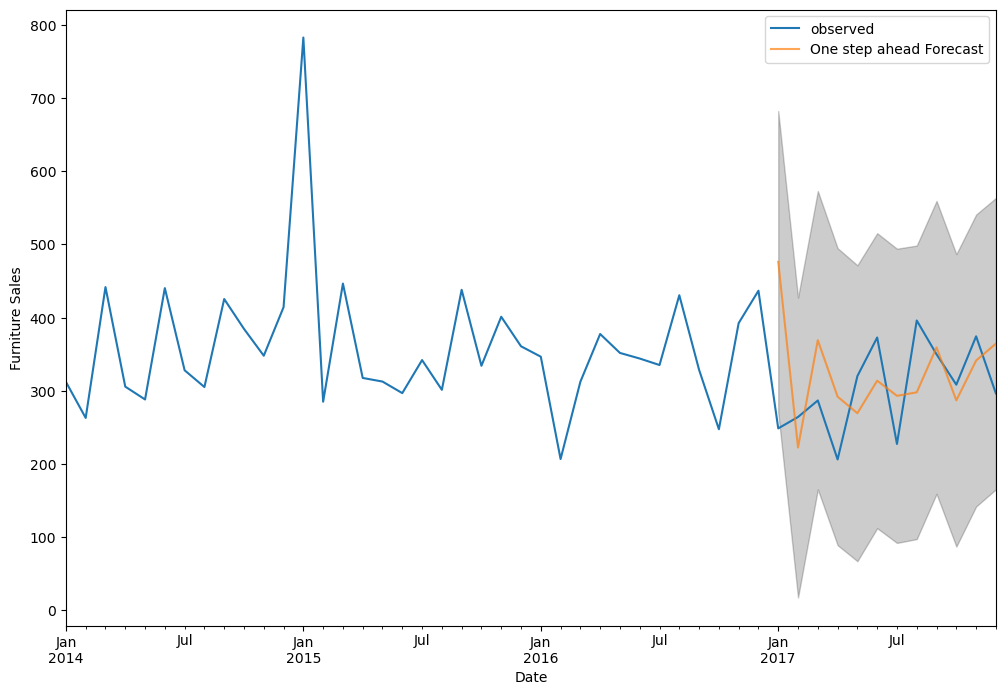

In [41]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = furniture_y['2014':].plot(label= 'observed')

pred.predicted_mean.plot(ax = ax, label = 'One step ahead Forecast',
                        alpha =0.7, figsize= (12,8))

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color = 'k', alpha= 0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

In [84]:
furniture_forecasted = pred.predicted_mean
furn_truth = furniture_y['2017-01-01':]
mse_furniture = ((furniture_forecasted - furn_truth) ** 2).mean()

print('MSE of forecast :{}'.format(round(mse_furniture,2)))
rmse_furniture = mse_furniture**0.5
print('RMSE of forecast :{}'.format(round(rmse_furniture,2)))

MSE of forecast :7834.0
RMSE of forecast :88.51


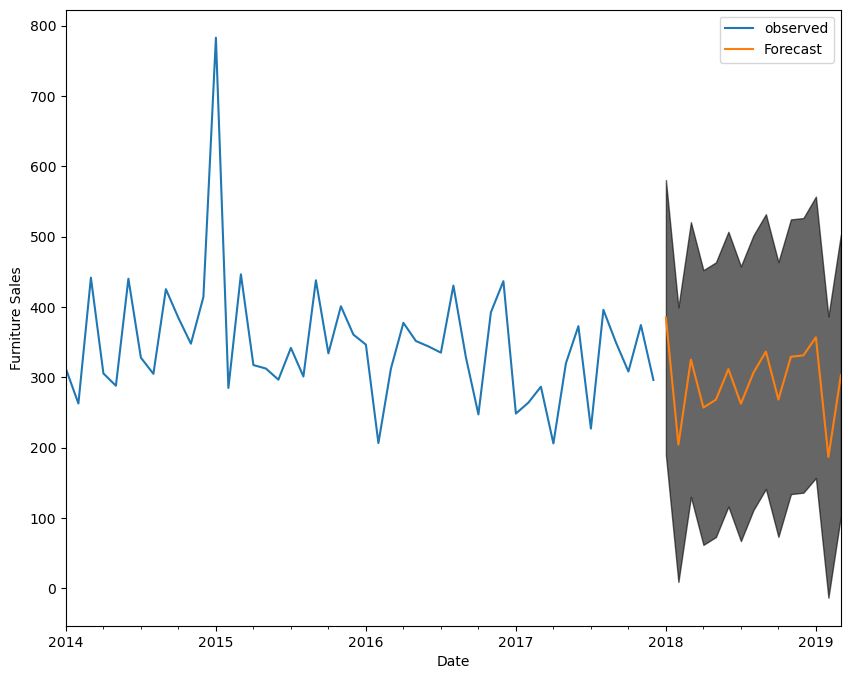

In [43]:
pred_uc = results.get_forecast(steps = 15)
pred_ci = pred_uc.conf_int()

ax = furniture_y.plot(label='observed', figsize=(10,8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k',alpha=0.6)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

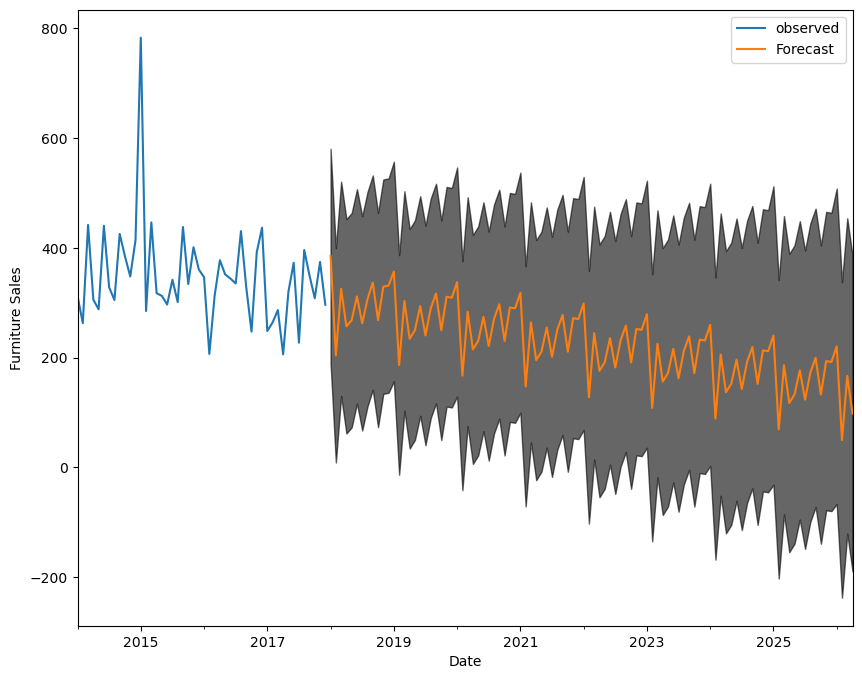

In [44]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = furniture_y.plot(label='observed', figsize=(10,8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color='k',alpha=0.6)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

# Office Supplies Forecast

In [45]:
o_s= super_df.loc[super_df['category']== 'Office Supplies']

In [46]:
o_s

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.900,5,0.0,34.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,9983,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,49505,Central,OFF-PA-10002195,Office Supplies,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132
9984,9985,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-LA-10003766,Office Supplies,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200
9985,9986,CA-2015-100251,2015-05-17,2015-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,11561,East,OFF-SU-10000898,Office Supplies,Supplies,Acme Hot Forged Carbon Steel Scissors with Nic...,55.600,4,0.0,16.1240
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200


In [47]:
o_s_col = ['row_id', 'order_id', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'subcategory',
       'product_name', 'quantity', 'discount', 'profit']

In [48]:
o_s.drop(o_s_col, axis =1 , inplace=True)

In [49]:
o_s

,order_date,sales
2,2016-06-12,14.620
4,2015-10-11,22.368
6,2014-06-09,7.280
8,2014-06-09,18.504
9,2014-06-09,114.900
...,...,...
9982,2016-09-22,35.560
9984,2015-05-17,31.500
9985,2015-05-17,55.600
9992,2017-02-26,29.600


In [50]:
o_s['order_date'] = pd.to_datetime(o_s['order_date'])
os = o_s.sort_values('order_date')
os = os.set_index('order_date')

In [51]:
os

,sales
order_date,
2014-01-03,16.448
2014-01-04,11.784
2014-01-04,272.736
2014-01-04,3.540
2014-01-05,19.536
...,...
2017-12-30,13.904
2017-12-30,52.776
2017-12-30,3.024


In [52]:
os_y = os['sales'].resample('MS').mean()

In [53]:
os_y.tail()

order_date
2017-08-01    210.208755
2017-09-01    112.309306
2017-10-01    135.512894
2017-11-01    117.873921
2017-12-01    108.316520
Freq: MS, Name: sales, dtype: float64

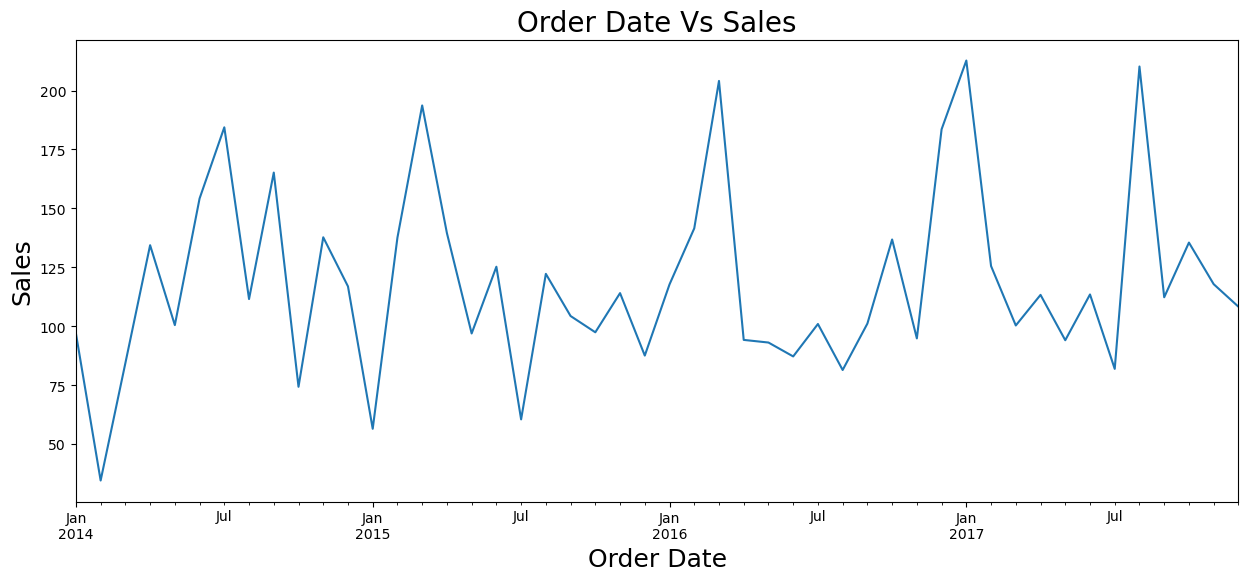

In [54]:
os_y.plot(figsize=(15,6))
plt.ylabel("Sales",fontsize=18)
plt.xlabel("Order Date",fontsize=18)
plt.title("Order Date Vs Sales",fontsize=20)
plt.show()

In [55]:
rc['figure.figsize']= 12, 14

In [56]:
decomposition_os = sm.tsa.seasonal_decompose(os_y,model='additive')

In [57]:
print("Trend \n ")
print(decomposition_os.trend)
print("Seasonal \n ")
print(decomposition_os.seasonal)
print("Residual \n ")
print(decomposition_os.resid)
print("Observed \n ")
print(decomposition_os.observed)

Trend 
 
order_date
2014-01-01           NaN
2014-02-01           NaN
2014-03-01           NaN
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01    114.584229
2014-08-01    117.191470
2014-09-01    126.041021
2014-10-01    130.810158
2014-11-01    130.876572
2014-12-01    129.523142
2015-01-01    123.155303
2015-02-01    118.437987
2015-03-01    116.347665
2015-04-01    114.775474
2015-05-01    114.751824
2015-06-01    112.542300
2015-07-01    113.871378
2015-08-01    116.586068
2015-09-01    117.181825
2015-10-01    115.726725
2015-11-01    113.678375
2015-12-01    111.932576
2016-01-01    112.032870
2016-02-01    112.019188
2016-03-01    110.185966
2016-04-01    111.692589
2016-05-01    112.531768
2016-06-01    115.730061
2016-07-01    123.686673
2016-08-01    126.977451
2016-09-01    121.988775
2016-10-01    118.462308
2016-11-01    119.298965
2016-12-01    120.435188
2017-01-01    120.737215
2017-02-01    125.308719
2017-03-01    131.138686
2017-

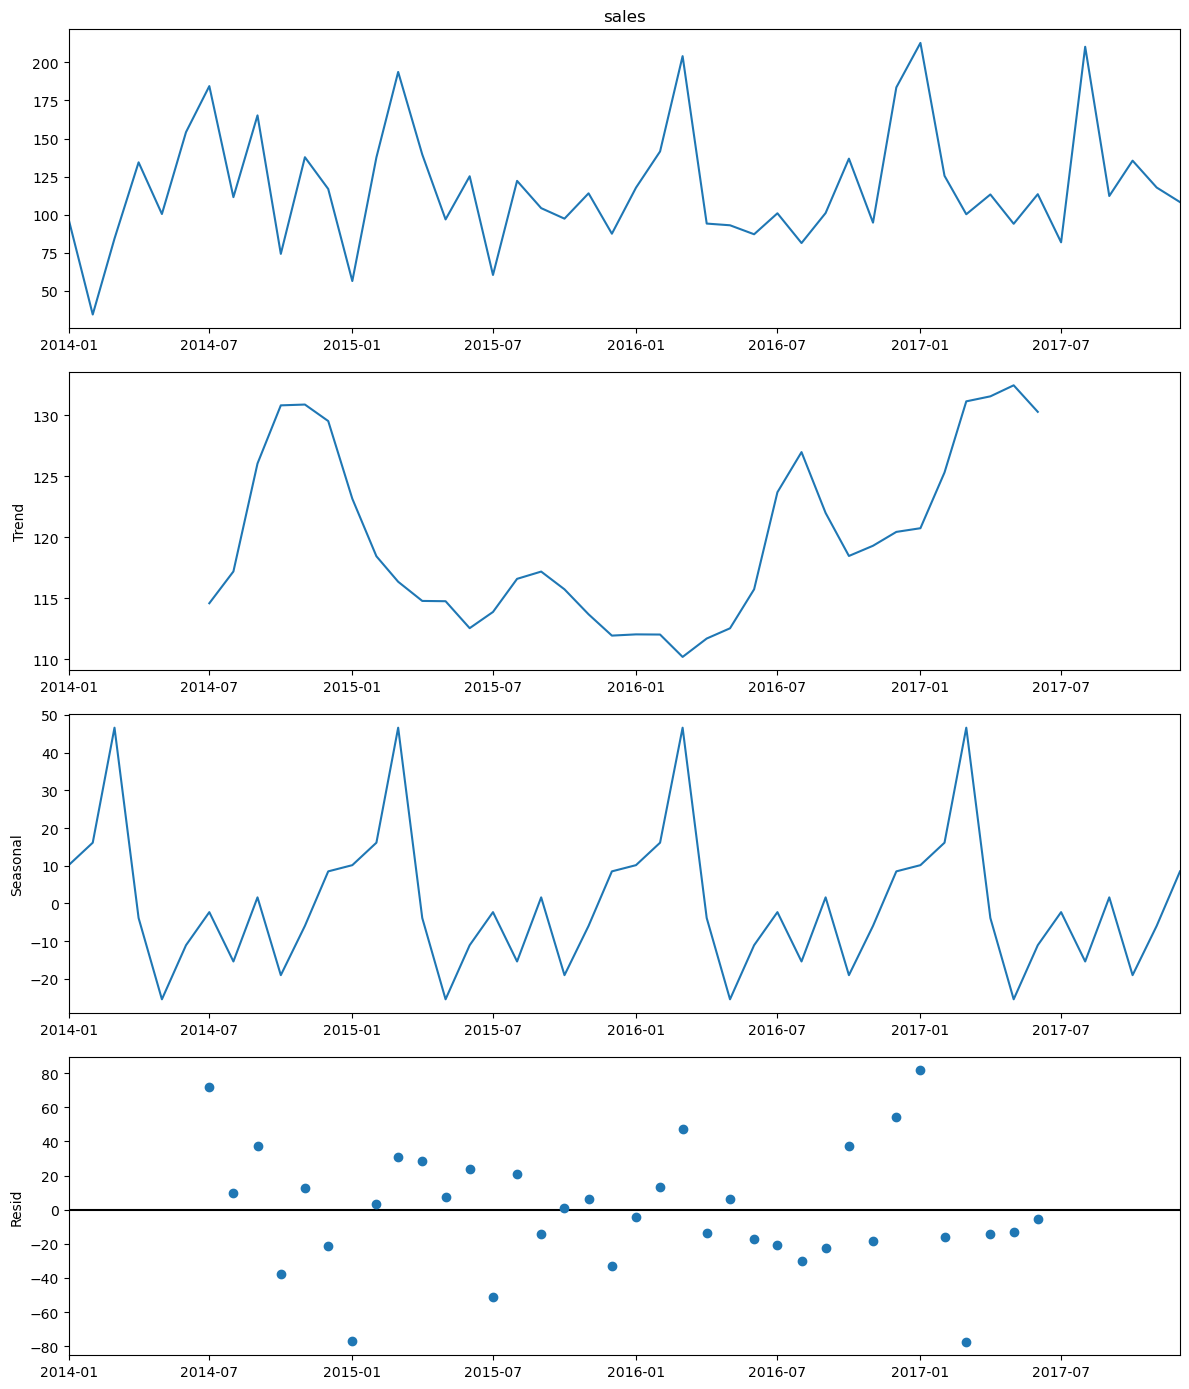

In [58]:
fig = decomposition_os.plot()
plt.show()

In [59]:
p=d=q=range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2], 12) for x in pdq]

aic_values = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        aic = calculate_aic(param, param_seasonal, os_y)
        aic_values.append((param, param_seasonal, aic))

# Find the combination of parameters with the lowest AIC
best_param, best_param_seasonal, best_aic = min(aic_values, key=lambda x: x[2])

print('Best ARIMA{} x {} 12 -- AIC : {}'.format(best_param, best_param_seasonal, best_aic))

Best ARIMA(0, 1, 1) x (0, 1, 1, 12) 12 -- AIC : 231.55283799226925


In [60]:
mod_os = sm.tsa.statespace.SARIMAX(os_y, 
                                order=param, 
                                seasonal_order=param_seasonal, 
#                                 enforce_stationarity=False, 
                                enforce_invertibility=False)

results_os = mod_os.fit()

In [61]:
print(results_os.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1146      0.265      0.433      0.665      -0.404       0.633
ma.L1         -1.0000    828.201     -0.001      0.999   -1624.244    1622.244
ar.S.L12       0.2697      1.088      0.248      0.804      -1.862       2.402
ma.S.L12      -0.9997   2223.226     -0.000      1.000   -4358.442    4356.443
sigma2      2044.1093   3.88e+06      0.001      1.000    -7.6e+06     7.6e+06


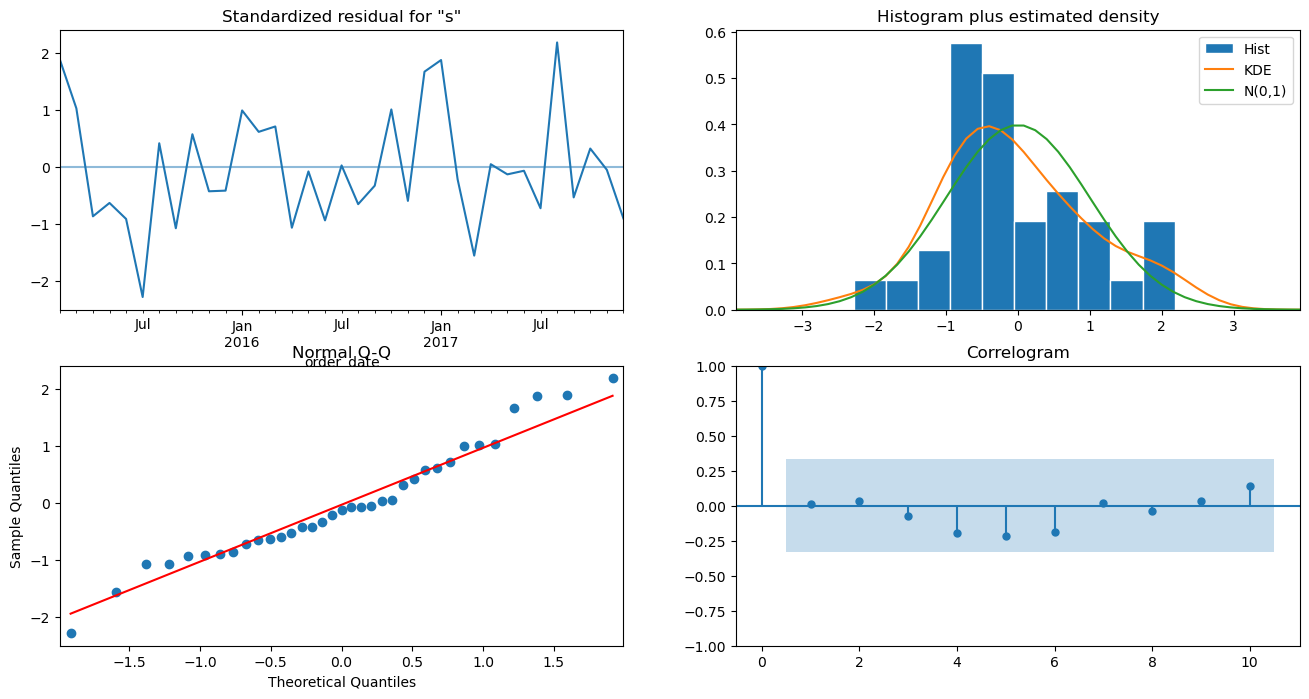

In [62]:
results_os.plot_diagnostics(figsize=(16,8))
plt.show()

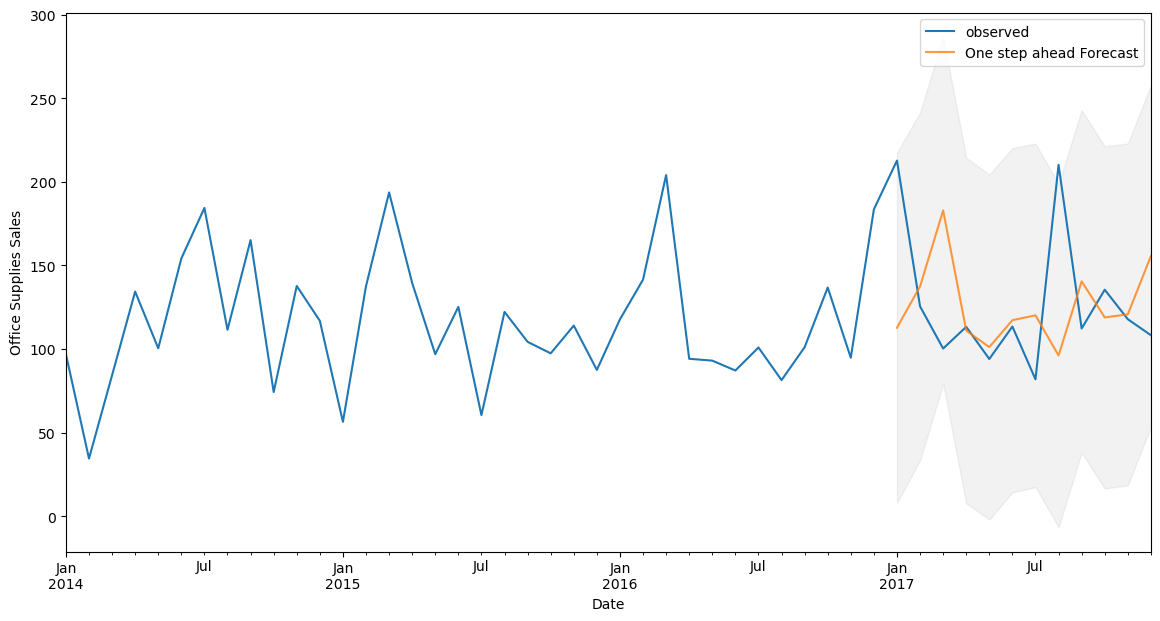

In [63]:
pred_os = results_os.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci_os = pred_os.conf_int()

ax = os_y['2014':].plot(label= 'observed')

pred_os.predicted_mean.plot(ax = ax, label = 'One step ahead Forecast',
                        alpha = 0.8, figsize= (14,7))

ax.fill_between(pred_ci_os.index,
               pred_ci_os.iloc[:,0],
               pred_ci_os.iloc[:,1],color = 'k', alpha= 0.05)

ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()

plt.show()

In [83]:
office_forecasted = pred_os.predicted_mean
office_truth = os_y['2017-01-01':]
mse_os = ((office_forecasted - office_truth) ** 2).mean()

print('MSE of forecast :{}'.format(round(mse_os,2)))
rmse_os = mse_os**0.5
print('RMSE of forecast :{}'.format(round(rmse_os,2)))

MSE of forecast :2900.98
RMSE of forecast :53.86


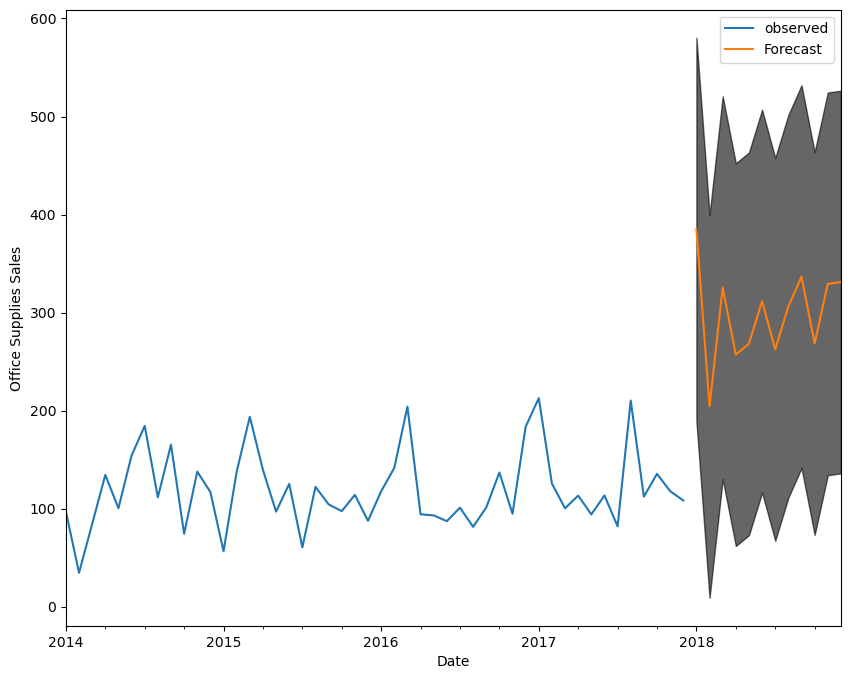

In [65]:
pred_uc_os = results.get_forecast(steps = 12)
pred_ci_os = pred_uc_os.conf_int()

ax = os_y.plot(label='observed', figsize=(10,8))
pred_uc_os.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_os.index,
               pred_ci_os.iloc[:,0],
               pred_ci_os.iloc[:,1],color='k',alpha=0.6)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')

plt.legend()
plt.show()

# Technology Forecast

In [66]:
technology= super_df.loc[super_df['category']== 'Technology']

In [67]:
technology = technology[['order_date','sales']]

In [68]:
technology['order_date'] = pd.to_datetime(technology['order_date'])
technology = technology.sort_values('order_date')
technology = technology.set_index('order_date')

In [69]:
technology_y = technology['sales'].resample('MS').mean()

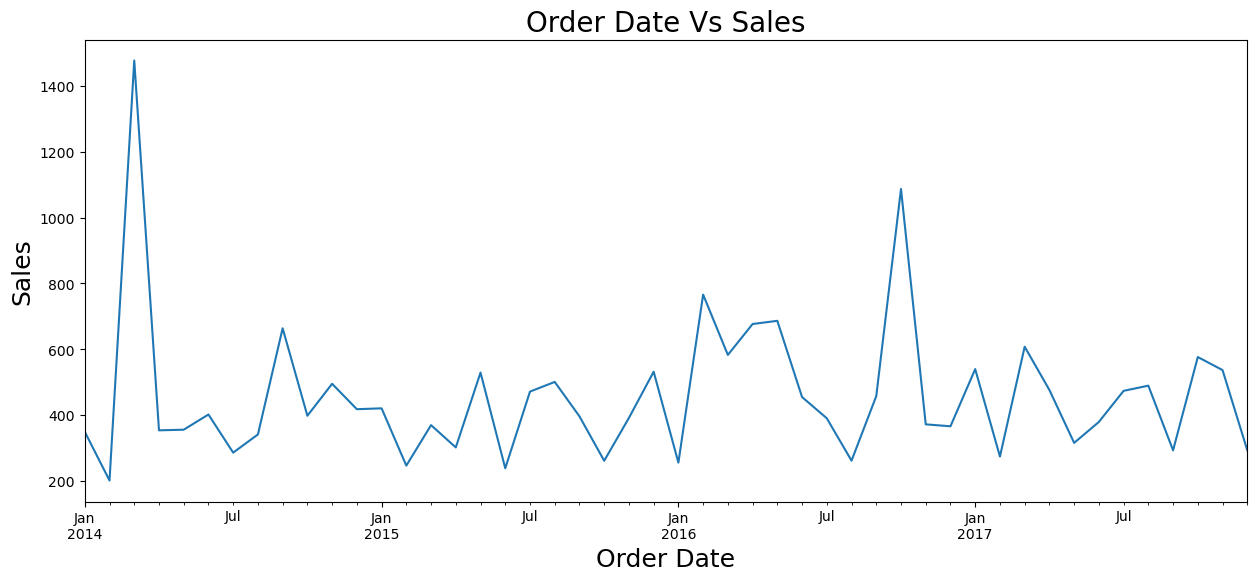

In [70]:
technology_y.plot(figsize=(15,6))
plt.ylabel("Sales",fontsize=18)
plt.xlabel("Order Date",fontsize=18)
plt.title("Order Date Vs Sales",fontsize=20)
plt.show()

In [71]:
rc['figure.figsize']= 12, 14

In [72]:
decomposition_technology = sm.tsa.seasonal_decompose(technology_y,model='additive')

In [73]:
print("Trend \n ")
print(decomposition_technology.trend)
print("Seasonal \n ")
print(decomposition_technology.seasonal)
print("Residual \n ")
print(decomposition_technology.resid)
print("Observed \n ")
print(decomposition_technology.observed)

Trend 
 
order_date
2014-01-01           NaN
2014-02-01           NaN
2014-03-01           NaN
2014-04-01           NaN
2014-05-01           NaN
2014-06-01           NaN
2014-07-01    481.364385
2014-08-01    486.219532
2014-09-01    441.925216
2014-10-01    393.576131
2014-11-01    398.645011
2014-12-01    399.074618
2015-01-01    399.998780
2015-02-01    414.383850
2015-03-01    409.884932
2015-04-01    393.030384
2015-05-01    383.006485
2015-06-01    383.432440
2015-07-01    381.304452
2015-08-01    396.087700
2015-09-01    426.642544
2015-10-01    451.170993
2015-11-01    473.356786
2015-12-01    488.927639
2016-01-01    494.564817
2016-02-01    481.209769
2016-03-01    473.797254
2016-04-01    510.786454
2016-05-01    544.398440
2016-06-01    536.671375
2016-07-01    541.606540
2016-08-01    532.943701
2016-09-01    513.470856
2016-10-01    506.150911
2016-11-01    482.336433
2016-12-01    463.726556
2017-01-01    464.049923
2017-02-01    477.025429
2017-03-01    479.658394
2017-

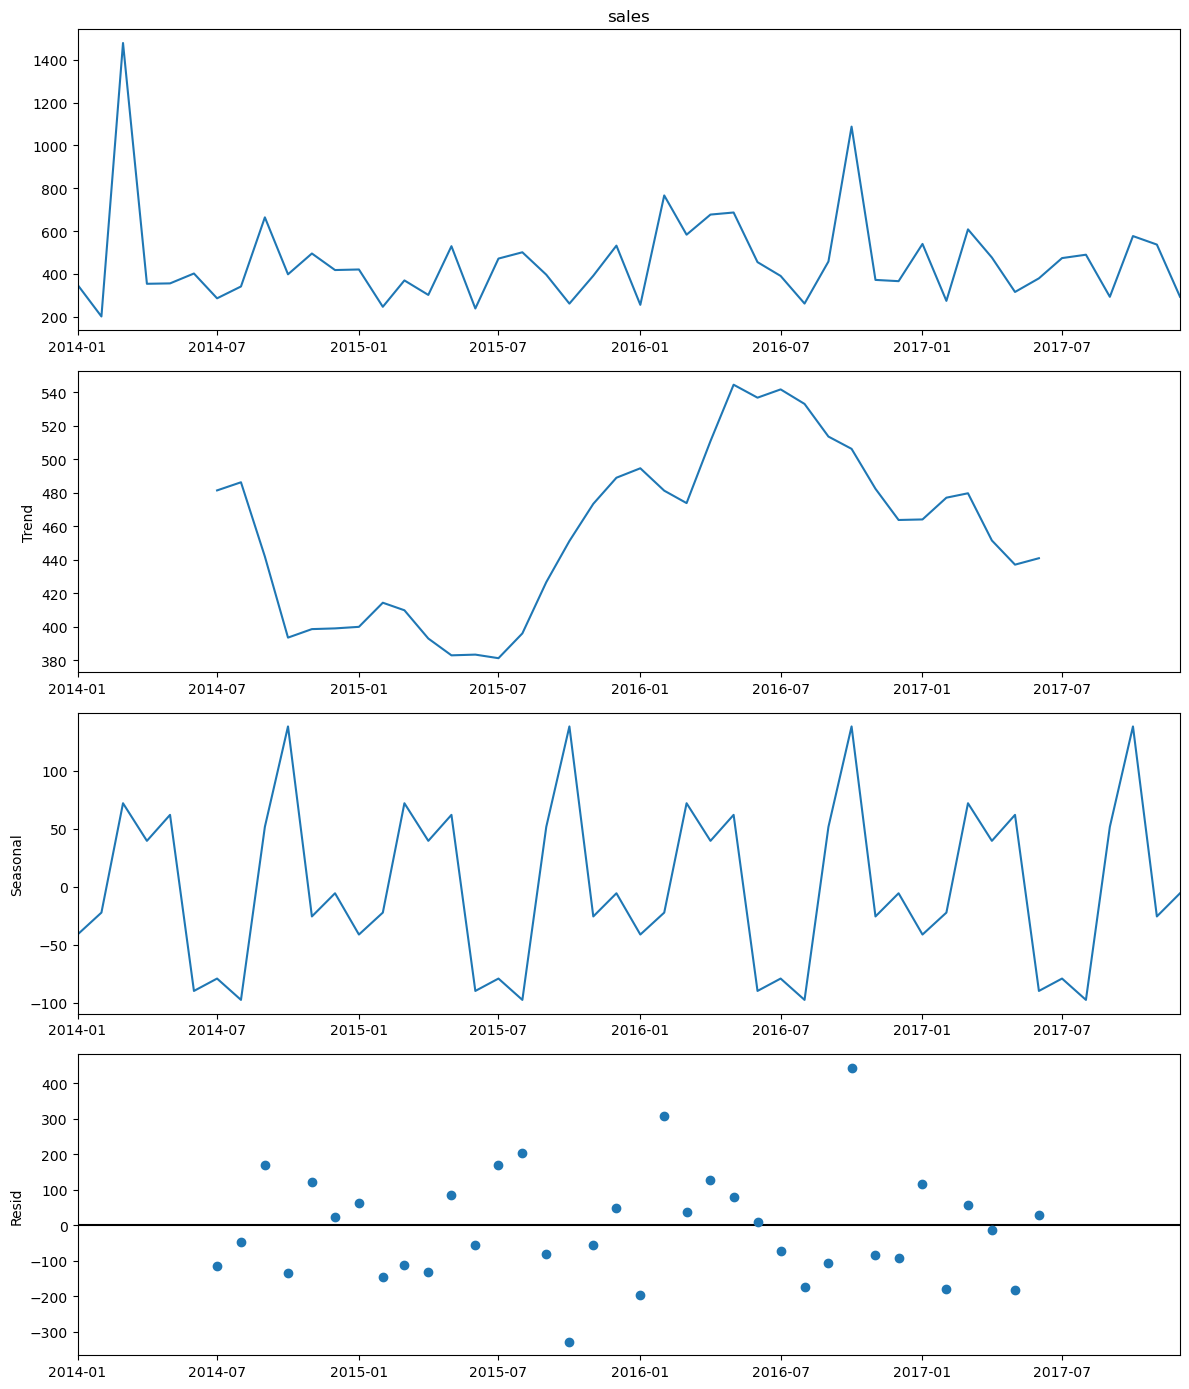

In [74]:
fig = decomposition_technology.plot()
plt.show()

In [75]:
p=d=q=range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2], 12) for x in pdq]

aic_values = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        aic = calculate_aic(param, param_seasonal, technology_y)
        aic_values.append((param, param_seasonal, aic))

# Find the combination of parameters with the lowest AIC
best_param, best_param_seasonal, best_aic = min(aic_values, key=lambda x: x[2])

print('Best ARIMA{} x {} 12 -- AIC : {}'.format(best_param, best_param_seasonal, best_aic))

Best ARIMA(1, 1, 1) x (1, 1, 1, 12) 12 -- AIC : 294.1604201223718


In [76]:
mod_technology = sm.tsa.statespace.SARIMAX(technology_y, 
                                order=param, 
                                seasonal_order=param_seasonal, 
#                                 enforce_stationarity=False, 
                                enforce_invertibility=False)

results_technology = mod_technology.fit()

In [77]:
print(results_technology.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2597      0.235     -1.103      0.270      -0.721       0.202
ma.L1         -1.0000      0.550     -1.817      0.069      -2.079       0.079
ar.S.L12      -0.3489      0.323     -1.081      0.280      -0.981       0.284
ma.S.L12      -0.6468      0.787     -0.822      0.411      -2.189       0.895
sigma2       5.38e+04   1.02e-05   5.26e+09      0.000    5.38e+04    5.38e+04


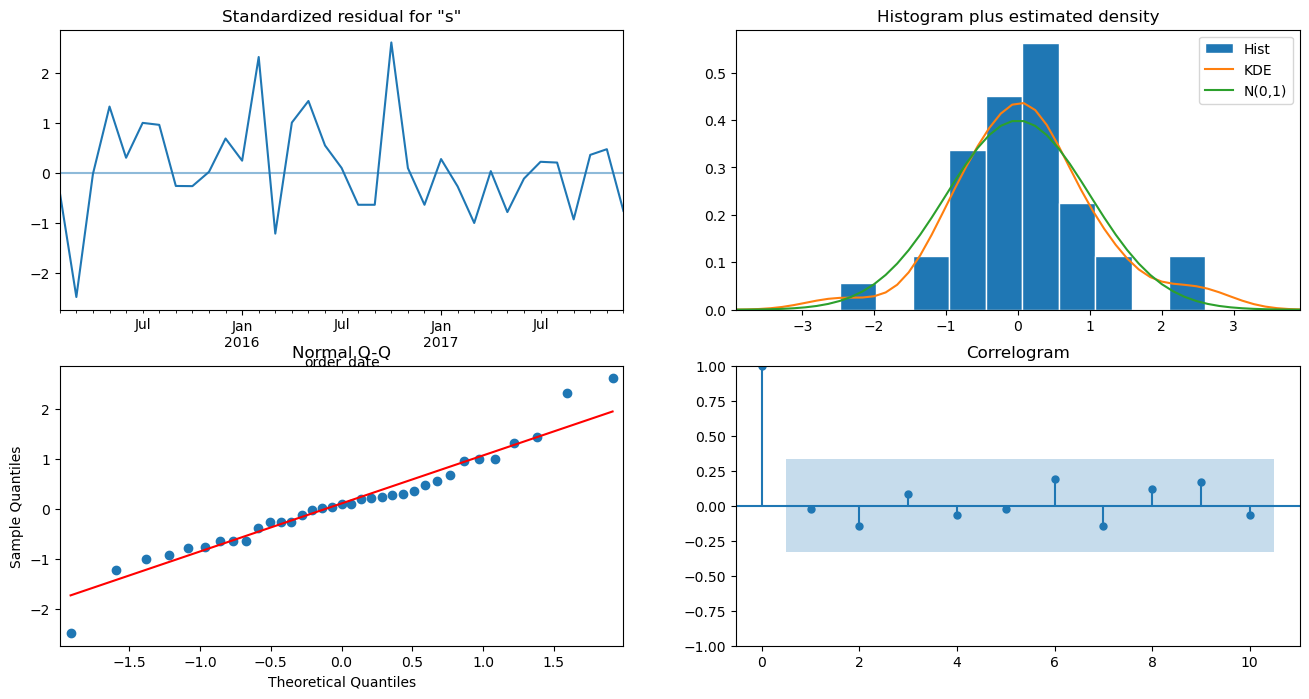

In [78]:
results_technology.plot_diagnostics(figsize=(16,8))
plt.show()

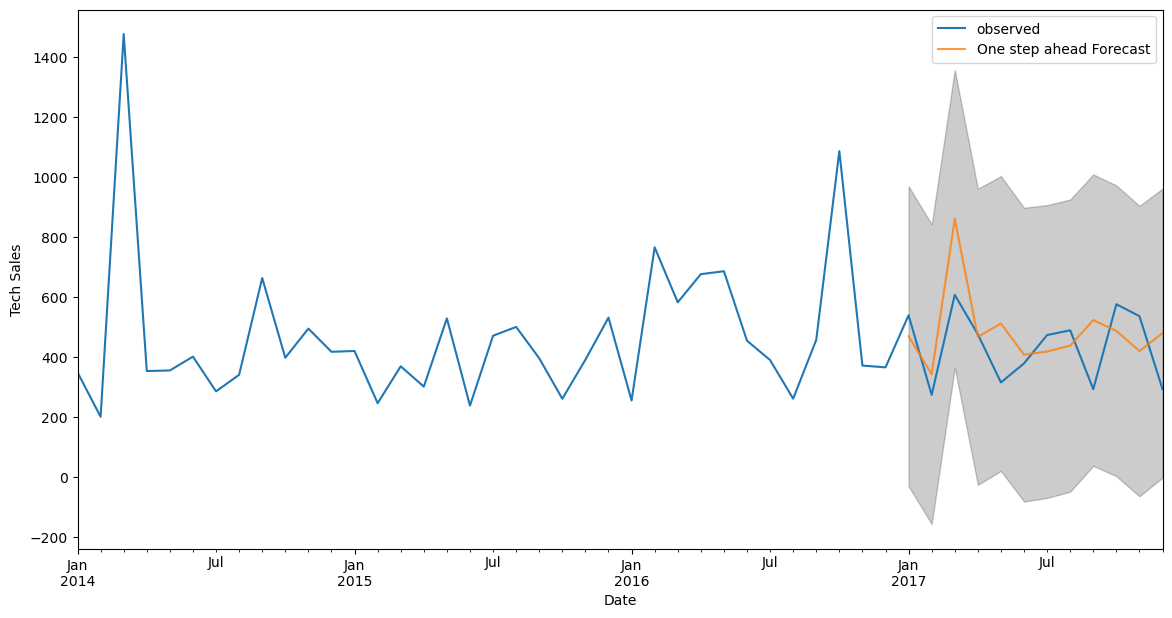

In [79]:
pred_tech = results_technology.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci_tech = pred_tech.conf_int()

ax = technology_y['2014':].plot(label= 'observed')

pred_tech.predicted_mean.plot(ax = ax, label = 'One step ahead Forecast',
                        alpha = 0.8, figsize= (14,7))

ax.fill_between(pred_ci_tech.index,
               pred_ci_tech.iloc[:,0],
               pred_ci_tech.iloc[:,1],color = 'k', alpha= 0.2)

ax.set_xlabel('Date')
ax.set_ylabel('Tech Sales')
plt.legend()

plt.show()

In [82]:
tech_forecasted = pred_tech.predicted_mean
tech_truth = technology_y['2017-01-01':]
mse_tech = ((tech_forecasted - tech_truth) ** 2).mean()

print('MSE of forecast :{}'.format(round(mse_tech,2)))
rmse_tech = mse_tech**0.5
print('RMSE of forecast :{}'.format(round(rmse_tech,2)))

MSE of forecast :19069.97
RMSE of forecast :138.09


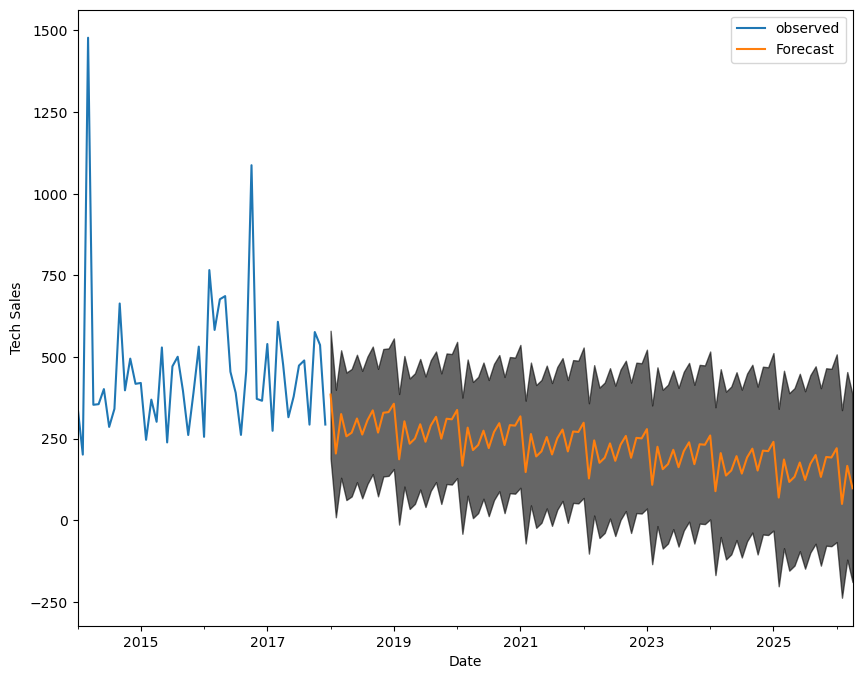

In [81]:
pred_uc_tech = results.get_forecast(steps = 100)
pred_ci_tech = pred_uc_tech.conf_int()

ax = technology_y.plot(label='observed', figsize=(10,8))
pred_uc_tech.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci_tech.index,
               pred_ci_tech.iloc[:,0],
               pred_ci_tech.iloc[:,1],color='k',alpha=0.6)
ax.set_xlabel('Date')
ax.set_ylabel('Tech Sales')

plt.legend()
plt.show()